### LOAD, INSPECT & QUERY MOVIE RATINGS DATA
 The code below implemets various data cleaning, processing an analysis methods in python pandas and numpy to analyse the movie ratings dataset. It also randomly recommends movies based on ratings, returns ratings per country and director and shows the relationship between a movie's rating and its gross income through visualization.

In [1]:
# Loading the data
import pandas as pd

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')


In [2]:
#Joining df, df_directors, and df_countries with an inner join.

df = pd.merge(left = df, right = df_countries, how = "inner", left_on = "country_id", right_on = "id")
df = pd.merge(left = df, right = df_directors, how = "inner", left_on = "director_id", right_on = "id")


   #### Inspecting Dataset

In [3]:
#Examining dataframes for analysis

df.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
2,The Green MileÊ,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
3,The Green MileÊ,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
4,The GodfatherÊ,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola


In [4]:
df_directors.head()

,id,director_name
0,1,Akira Kurosawa
1,2,Alejandro Amenabar
2,3,Alejandro G. Inarritu
3,3,Alejandro G. Inarritu
4,4,Alfred Hitchcock


In [5]:
df_countries.head()

,id,country
0,1,USA
1,2,Italy
2,3,New Zealand
3,4,Japan
4,5,Brazil


In [6]:
columns = df.columns
print(columns)

Index(['movie_title', 'director_id', 'country_id', 'content_rating',
       'title_year', 'imdb_score', 'gross', 'duration', 'id_x', 'country',
       'id_y', 'director_name'],
      dtype='object')


In [7]:
dtypes = df.dtypes
print(dtypes)

movie_title        object
director_id         int64
country_id          int64
content_rating     object
title_year          int64
imdb_score        float64
gross               int64
duration            int64
id_x                int64
country            object
id_y                int64
director_name      object
dtype: object


   #### Cleaning DataFrame

In [8]:
#deleting duplicate column
del df["id_x"]
del df["id_y"]

In [9]:
df.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,country,director_name
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,USA,Frank Darabont
1,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,USA,Frank Darabont
2,The Green MileÊ,34,1,R,1999,8.5,136801374,189,USA,Frank Darabont
3,The Green MileÊ,34,1,R,1999,8.5,136801374,189,USA,Frank Darabont
4,The GodfatherÊ,33,1,R,1972,9.2,134821952,175,USA,Francis Ford Coppola


In [10]:
#removing extra charater at end of movie title
df["movie_title"] = df["movie_title"].str.replace("Ê","")
print(df["movie_title"].head(10))

0    The Shawshank Redemption
1    The Shawshank Redemption
2              The Green Mile
3              The Green Mile
4               The Godfather
5               The Godfather
6               The Godfather
7      The Godfather: Part II
8      The Godfather: Part II
9      The Godfather: Part II
Name: movie_title, dtype: object


In [11]:
#return size of original Dataframe df
df.shape

(408, 10)

In [12]:
#removing duplicates
df2 = df.drop_duplicates()

In [13]:
#size of DataFrame after cleaning data
total_movies=df2.shape
print("Total movies in sheet: ", total_movies[0])

Total movies in sheet:  178


   #### ANALYSING & SUMMARIZING DATA

In [14]:
#summary statistics for imdb_score and gross
score_gross_description = df2[["imdb_score", "gross"]].describe()
print(score_gross_description)

       imdb_score         gross
count  178.000000  1.780000e+02
mean     8.294382  1.030402e+08
std      0.266960  1.242549e+08
min      8.000000  8.060000e+03
25%      8.100000  1.318510e+07
50%      8.200000  5.194371e+07
75%      8.475000  1.522436e+08
max      9.300000  6.232795e+08


In [15]:
#director with the most movies

director_with_most = df2.director_name.value_counts().head(1)
print(director_with_most)

Christopher Nolan    7
Name: director_name, dtype: int64


In [16]:
#return movie ratings for director_with_most(dwm)
dwm = df2["director_name"]== "Christopher Nolan"
df_chris = df2[dwm]

#storing attributes in list
atts =["movie_title", "imdb_score"]

In [17]:
all_movies_ratings = df_chris[atts]
print(all_movies_ratings)

              movie_title  imdb_score
13        The Dark Knight         9.0
20              Inception         8.8
27           Interstellar         8.6
34                Memento         8.5
41           The Prestige         8.5
48  The Dark Knight Rises         8.5
55          Batman Begins         8.3


In [18]:
#average rating for director_with_most_movies
import numpy as np
dwm_mean = df_chris["imdb_score"].mean()
print(dwm_mean)

8.6


In [19]:
#total number of movies per director in df2
count = df2.director_name.value_counts()
print(count)

Christopher Nolan    7
Martin Scorsese      6
Quentin Tarantino    6
Steven Spielberg     5
Ridley Scott         4
                    ..
Joel Coen            1
James McTeigue       1
Gavin O'Connor       1
Elia Kazan           1
George Miller        1
Name: director_name, Length: 117, dtype: int64


In [20]:
#recommending random movies

import random
#random.seed(0)

score = df2["imdb_score"]> 8.3
df_score = df2[score]
rand = random.randint(0, len(df_score)-1)
rand_goodmovie = df_score[rand:rand +1]
random_title = rand_goodmovie["movie_title"]
print(random_title)
random_imdb_score= rand_goodmovie["imdb_score"]
print(random_imdb_score)

27    Interstellar
Name: movie_title, dtype: object
27    8.6
Name: imdb_score, dtype: float64


In [21]:
#summarizing df2
#creating series containing each directors name and rating

direcs = ["director_name","imdb_score"]
dafr = df2[direcs]

#using pivot_table method,

d_df2 = pd.pivot_table(dafr, index = ["director_name"])
directors = d_df2.squeeze()

print(directors)
type(directors)

director_name
Akira Kurosawa           8.70
Alejandro Amenabar       8.10
Alejandro G. Inarritu    8.10
Alfred Hitchcock         8.50
Andrew Stanton           8.30
                         ... 
Victor Fleming           8.15
Vincent Paronnaud        8.00
Wes Anderson             8.10
Wolfgang Petersen        8.40
Woody Allen              8.10
Name: imdb_score, Length: 117, dtype: float64


pandas.core.series.Series

In [22]:
#non-USA movies after year 1960 by miyazaki

c1 = df2["country_id"] != 1
c2 = df2["title_year"] > 1960
c3 = df2["director_id"] == 46

miyazaki = df2[c1 & c2 & c3]

print(len(miyazaki))
print(miyazaki)

3
              movie_title  director_id  country_id content_rating  title_year  \
346         Spirited Away           46           4             PG        2001   
349     Princess Mononoke           46           4          PG-13        1997   
352  Howl's Moving Castle           46           4             PG        2004   

     imdb_score     gross  duration country   director_name  
346         8.6  10049886       125   Japan  Hayao Miyazaki  
349         8.4   2298191       134   Japan  Hayao Miyazaki  
352         8.2   4710455       119   Japan  Hayao Miyazaki  


In [23]:
#median rating per director per country

#using pivot table
pivot_agg= pd.pivot_table(df2, index=["country", "director_name"],values=["imdb_score"],aggfunc=[np.median])

print(pivot_agg)

                                      median
                                  imdb_score
country      director_name                  
Argentina    Juan Jose Campanella       8.20
Australia    George Miller              8.10
Brazil       Fernando Meirelles         8.70
             Jose Padilha               8.10
Canada       Denis Villeneuve           8.20
...                                      ...
USA          Tony Scott                 8.00
             Victor Fleming             8.15
             Wes Anderson               8.10
             Woody Allen                8.10
West Germany Wolfgang Petersen          8.40

[125 rows x 1 columns]


In [24]:
#gladiatr movie duration
glad = df2[df2["movie_title"] == "Gladiator" ]
gladiator_duration = glad["duration"]
print(gladiator_duration)

203    171
Name: duration, dtype: int64


   #### Visualization - Scatterplot & Histogram

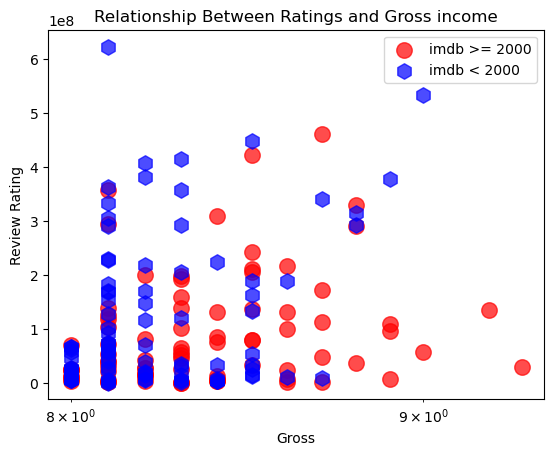

In [25]:
#relationship between imdb_score to gross

import matplotlib.pyplot as plt1

#creating new DataFrame for each category
df_before_2000 = df2[df2["title_year"] < 2000]
df_after_2000 = df2[df2["title_year"] >= 2000]

#setting options
plt1.scatter(df_before_2000["imdb_score"], df_before_2000["gross"], marker = "o", color= "r", alpha = 0.7, s = 124, label = "imdb >= 2000")
plt1.scatter(df_after_2000["imdb_score"], df_after_2000["gross"], marker = "h", color= "b", alpha = 0.7, s = 124, label = "imdb < 2000")

plt1.legend(loc="best")
plt1.xlabel("Gross")
plt1.ylabel("Review Rating")
plt1.title("Relationship Between Ratings and Gross income")
axes = plt1.gca()
axes.set_xscale("log")

#displaying the visualization
plt1.show()

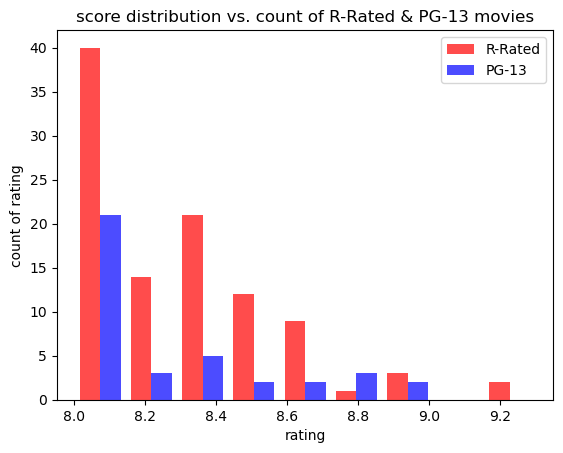

In [26]:
#score distribution vs count of various ratings

import matplotlib.pyplot as plt2

#creating new DataFrame for each rating type
df_R = df2[df2["content_rating"]== "R"]
df_PG13 = df2[df2["content_rating"]== "PG-13"]

df_RR = df_R["imdb_score"]
df_PG133 = df_PG13["imdb_score"]

#setting options
plt2.hist([df_RR,df_PG133], alpha= 0.7, color = ["red","blue"],label = ["R-Rated","PG-13"], bins= "auto")
plt2.xlabel("rating")
plt2.ylabel("count of rating")
plt2.title("score distribution vs. count of R-Rated & PG-13 movies")
plt2.legend(loc= "best")

#Displaying the visualization
plt2.show() 
